# Exploring FIRM-NASA Fire Alerts Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import missingno as msn

---

# IMPORT

In [ ]:
DL_FIRE_M_C61_nrt = pd.read_csv("../data/FIRM-NASA-fire-alert-data/DL_FIRE_M-C61_591394/fire_nrt_M-C61_591394.csv", parse_dates=["acq_date"])
DL_FIRE_M_C61_arc = pd.read_csv("../data/FIRM-NASA-fire-alert-data/DL_FIRE_M-C61_591394/fire_archive_M-C61_591394.csv", parse_dates=["acq_date"])
DL_FIRE_VIIRS_NOAA20_nrt = pd.read_csv("../data/FIRM-NASA-fire-alert-data/DL_FIRE_J1V-C2_591395/fire_nrt_J1V-C2_591395.csv", parse_dates=["acq_date"])
DL_FIRE_VIIRS_NOAA20_arc = pd.read_csv("../data/FIRM-NASA-fire-alert-data/DL_FIRE_J1V-C2_591395/fire_archive_J1V-C2_591395.csv", parse_dates=["acq_date"])
# DL_FIRE_VIIRS_NOAA21_nrt = pd.read_csv("../data/FIRM-NASA-fire-alert-data/DL_FIRE_J2V-C2_591396/fire_nrt_J2V-C2_591396.csv", parse_dates=["acq_date"])
DL_FIRE_VIIRS_SNNP_nrt = pd.read_csv("../data/FIRM-NASA-fire-alert-data/DL_FIRE_SV-C2_591397/fire_nrt_SV-C2_591397.csv", parse_dates=["acq_date"])
DL_FIRE_VIIRS_SNNP_arc = pd.read_csv("../data/FIRM-NASA-fire-alert-data/DL_FIRE_SV-C2_591397/fire_archive_SV-C2_591397.csv", parse_dates=["acq_date"])

In [ ]:
DL_FIRE = pd.concat(
    [
        # DL_FIRE_M_C61_nrt, 
        # DL_FIRE_M_C61_arc,
        DL_FIRE_VIIRS_NOAA20_nrt,
        DL_FIRE_VIIRS_NOAA20_arc,
        # DL_FIRE_VIIRS_NOAA21_nrt,
        DL_FIRE_VIIRS_SNNP_nrt,
        DL_FIRE_VIIRS_SNNP_arc
    ], 
    axis=0
).sort_values(by="acq_date", ascending=False).reset_index(drop=True)

DL_FIRE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500896 entries, 0 to 3500895
Data columns (total 15 columns):
 #   Column      Dtype         
---  ------      -----         
 0   latitude    float64       
 1   longitude   float64       
 2   brightness  float64       
 3   scan        float64       
 4   track       float64       
 5   acq_date    datetime64[ns]
 6   acq_time    int64         
 7   satellite   object        
 8   instrument  object        
 9   confidence  object        
 10  version     object        
 11  bright_t31  float64       
 12  frp         float64       
 13  daynight    object        
 14  type        float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(5)
memory usage: 400.6+ MB


In [4]:
DL_FIRE

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,17.67810,100.71805,330.45,0.39,0.37,2025-03-20,635,N,VIIRS,n,2.0NRT,296.39,1.12,D,NaN
1,19.39021,98.02483,331.70,0.39,0.44,2025-03-20,659,N20,VIIRS,l,2.0NRT,304.45,1.73,D,NaN
2,15.47269,103.92846,349.51,0.42,0.61,2025-03-20,659,N20,VIIRS,n,2.0NRT,297.54,9.06,D,NaN
3,15.47313,103.93243,352.87,0.42,0.61,2025-03-20,659,N20,VIIRS,n,2.0NRT,296.41,9.43,D,NaN
4,15.46179,103.93364,338.02,0.42,0.61,2025-03-20,659,N20,VIIRS,n,2.0NRT,295.71,5.15,D,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3500891,16.09800,99.77119,328.34,0.59,0.70,2012-01-20,725,N,VIIRS,n,2,285.92,6.15,D,0.0
3500892,16.53583,99.41296,331.31,0.57,0.69,2012-01-20,725,N,VIIRS,n,2,284.83,3.79,D,0.0
3500893,18.04026,98.74612,333.39,0.53,0.67,2012-01-20,725,N,VIIRS,n,2,293.38,10.00,D,0.0
3500894,18.03988,98.74202,352.30,0.53,0.67,2012-01-20,725,N,VIIRS,n,2,294.78,12.62,D,0.0


# EXPLORE

In [5]:
cat_cols = ["satellite", "instrument", "confidence", "version", "daynight", "type"]
num_cols = ["brightness", "scan", "track", "bright_t31", "frp"]

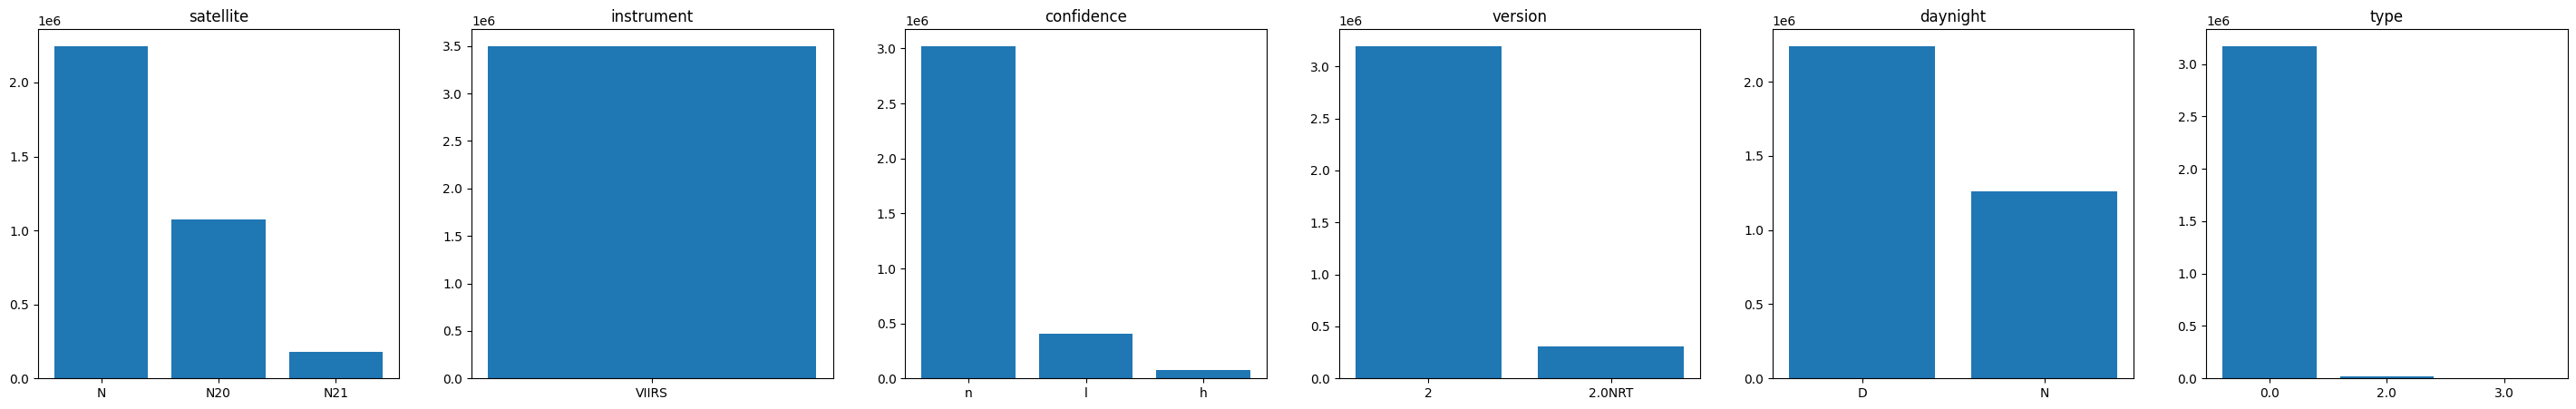

In [6]:
fig, axs = plt.subplots(1, len(cat_cols), figsize=(6*len(cat_cols), 5))

for col, ax in zip(cat_cols, axs):
    counts = DL_FIRE[col].value_counts()
    ax.bar(height=counts.values, x=counts.index.astype("string"))
    ax.set(title=col)

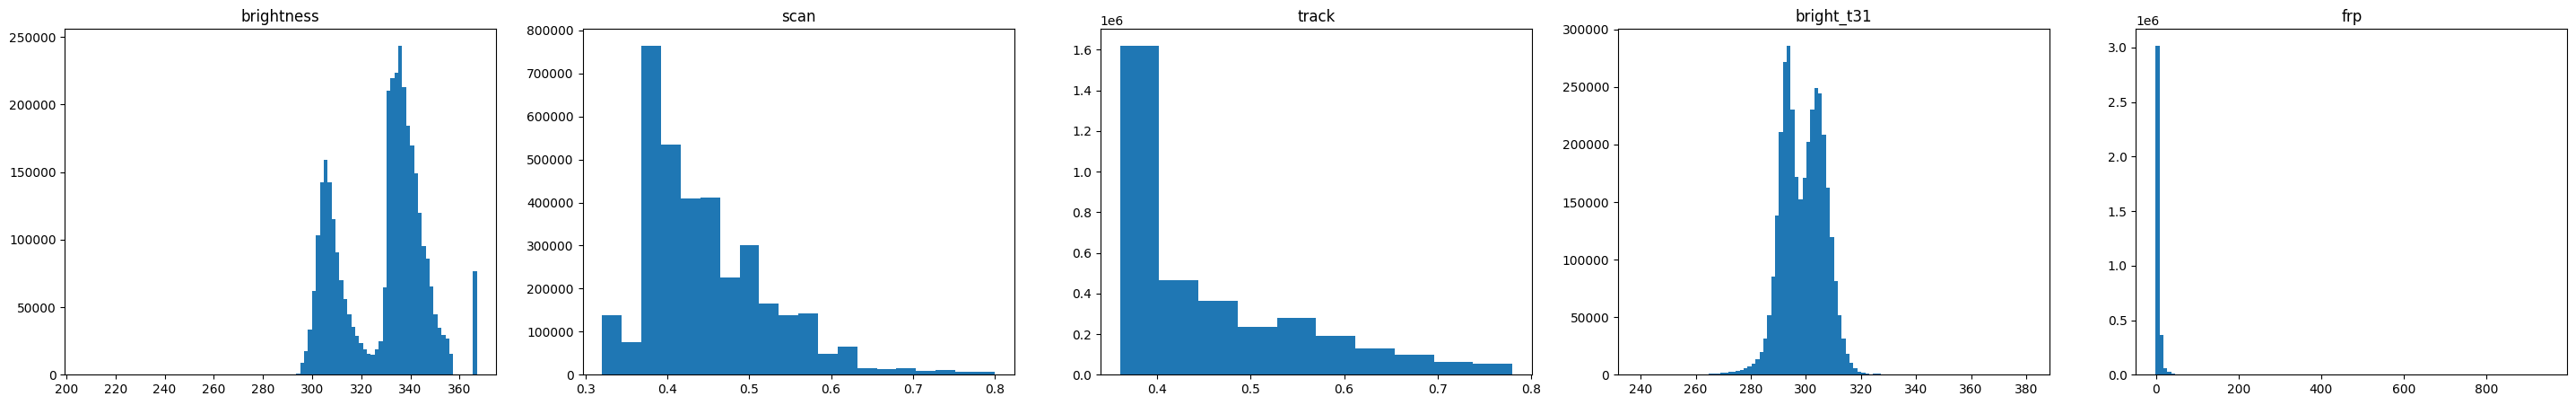

In [7]:
fig, axs = plt.subplots(1, len(num_cols), figsize=(6*len(cat_cols), 5))

bin_n = [100, 20, 10, 100, 100, 20]

for col, ax, b in zip(num_cols, axs, bin_n):
    ax.hist(DL_FIRE[col], bins=b)
    ax.set(title=col)

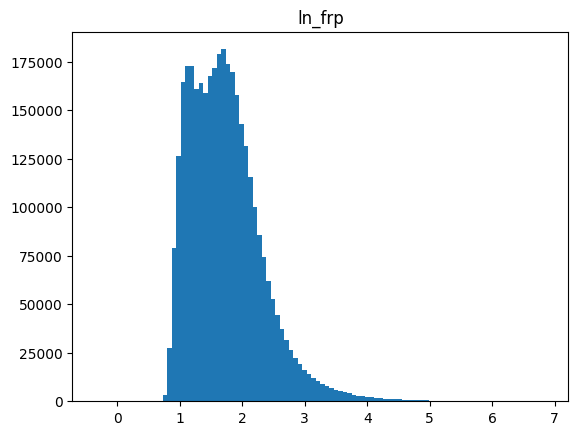

In [8]:
DL_FIRE["ln_frp"] = np.log(DL_FIRE["frp"] + 2)
plt.hist(DL_FIRE["ln_frp"], bins=100)
plt.title("ln_frp");

In [9]:
DL_FIRE.isna().sum()

latitude           0
longitude          0
brightness         0
scan               0
track              0
acq_date           0
acq_time           0
satellite          0
instrument         0
confidence         0
version            0
bright_t31         0
frp                0
daynight           0
type          304257
ln_frp             0
dtype: int64

In [10]:
corr_mat = DL_FIRE.corr(numeric_only=True)
num_col = np.astype(corr_mat.index.values, object)
corr_mat

,latitude,longitude,brightness,scan,track,acq_time,bright_t31,frp,type,ln_frp
latitude,1.000000,-0.271835,-0.087466,-0.006100,-0.025051,0.102744,0.040107,0.008619,-0.101178,-0.028660
longitude,-0.271835,1.000000,0.106952,0.029408,0.045743,-0.131682,-0.005339,-0.016380,0.021928,0.043802
brightness,-0.087466,0.106952,1.000000,-0.016203,0.056587,-0.860152,0.714073,0.370642,-0.086355,0.755683
scan,-0.006100,0.029408,-0.016203,1.000000,0.441214,-0.004327,-0.099281,0.109463,0.012323,0.189648
track,-0.025051,0.045743,0.056587,0.441214,1.000000,-0.033832,-0.209750,0.078447,0.011909,0.131413
acq_time,0.102744,-0.131682,-0.860152,-0.004327,-0.033832,1.000000,-0.712233,-0.276391,0.096528,-0.623253
bright_t31,0.040107,-0.005339,0.714073,-0.099281,-0.209750,-0.712233,1.000000,0.323985,-0.089835,0.565247
frp,0.008619,-0.016380,0.370642,0.109463,0.078447,-0.276391,0.323985,1.000000,-0.029127,0.724314
type,-0.101178,0.021928,-0.086355,0.012323,0.011909,0.096528,-0.089835,-0.029127,1.000000,-0.059892
ln_frp,-0.028660,0.043802,0.755683,0.189648,0.131413,-0.623253,0.565247,0.724314,-0.059892,1.000000


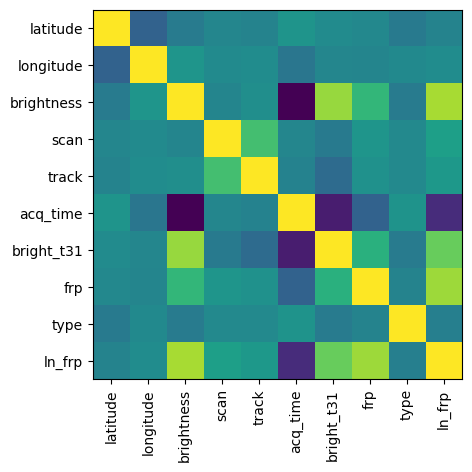

In [11]:
plt.imshow(corr_mat)
plt.xticks(ticks=range(len(num_col)), labels=num_col, rotation=90)
plt.yticks(ticks=range(len(num_col)), labels=num_col);

In [12]:
DL_FIRE_hc = DL_FIRE[(DL_FIRE["confidence"] == 'h') | (DL_FIRE["confidence"] == 'n')]
DL_FIRE_hc

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,ln_frp
0,17.67810,100.71805,330.45,0.39,0.37,2025-03-20,635,N,VIIRS,n,2.0NRT,296.39,1.12,D,NaN,1.137833
2,15.47269,103.92846,349.51,0.42,0.61,2025-03-20,659,N20,VIIRS,n,2.0NRT,297.54,9.06,D,NaN,2.403335
3,15.47313,103.93243,352.87,0.42,0.61,2025-03-20,659,N20,VIIRS,n,2.0NRT,296.41,9.43,D,NaN,2.436241
4,15.46179,103.93364,338.02,0.42,0.61,2025-03-20,659,N20,VIIRS,n,2.0NRT,295.71,5.15,D,NaN,1.967112
5,14.81930,98.66633,333.13,0.56,0.43,2025-03-20,659,N20,VIIRS,n,2.0NRT,301.95,4.73,D,NaN,1.906575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3500891,16.09800,99.77119,328.34,0.59,0.70,2012-01-20,725,N,VIIRS,n,2,285.92,6.15,D,0.0,2.098018
3500892,16.53583,99.41296,331.31,0.57,0.69,2012-01-20,725,N,VIIRS,n,2,284.83,3.79,D,0.0,1.756132
3500893,18.04026,98.74612,333.39,0.53,0.67,2012-01-20,725,N,VIIRS,n,2,293.38,10.00,D,0.0,2.484907
3500894,18.03988,98.74202,352.30,0.53,0.67,2012-01-20,725,N,VIIRS,n,2,294.78,12.62,D,0.0,2.682390


In [13]:
DL_FIRE_bgd = DL_FIRE_hc.groupby("acq_date")

Text(0.5, 1.0, 'Number of Fire Alert over Time')

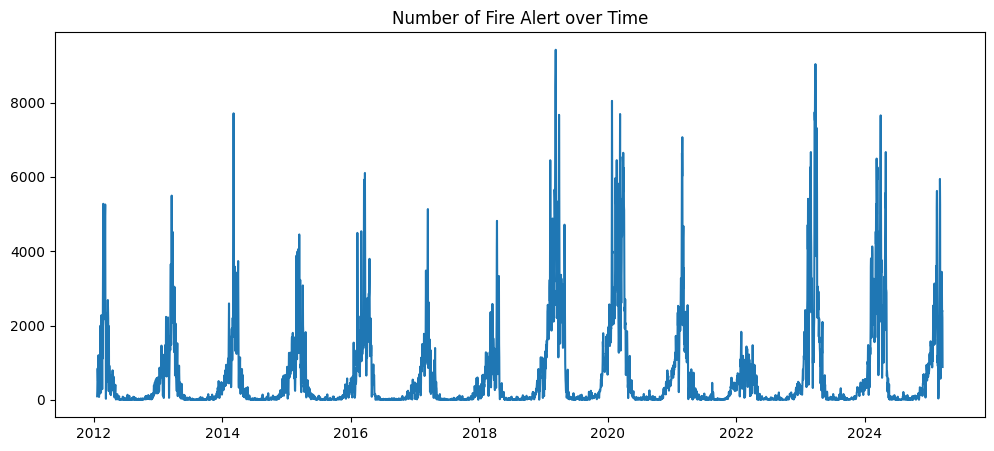

In [14]:
plt.figure(figsize=(12,5))
plt.plot(DL_FIRE_bgd["acq_date"].aggregate(["count"]))
plt.title("Number of Fire Alert over Time")

In [15]:
DL_FIRE_monthly = DL_FIRE_hc.set_index("acq_date").resample("M")["frp"].mean()
DL_FIRE_monthly = DL_FIRE_monthly.fillna(0)  # Fill any missing months with 0 or use .interpolate()

C:\Users\poyni\AppData\Local\Temp\ipykernel_16064\609689823.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  DL_FIRE_monthly = DL_FIRE_hc.set_index("acq_date").resample("M")["frp"].mean()


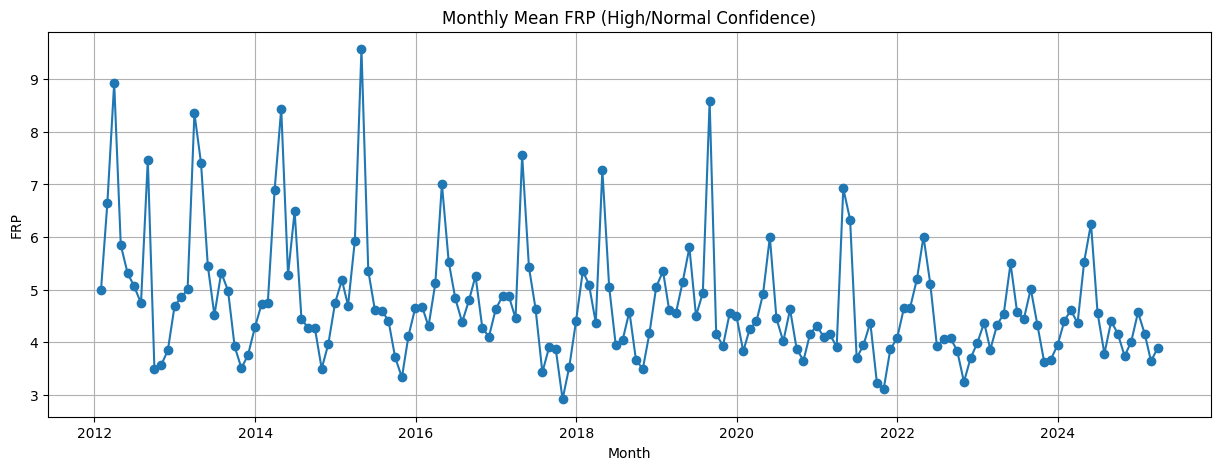

In [16]:
plt.figure(figsize=(15,5))
plt.plot(DL_FIRE_monthly, marker='o')
plt.title("Monthly Mean FRP (High/Normal Confidence)")
plt.xlabel("Month")
plt.ylabel("FRP")
plt.grid(True)

Text(0.5, 1.0, 'Autocorrelation of Monthly Mean FRP')

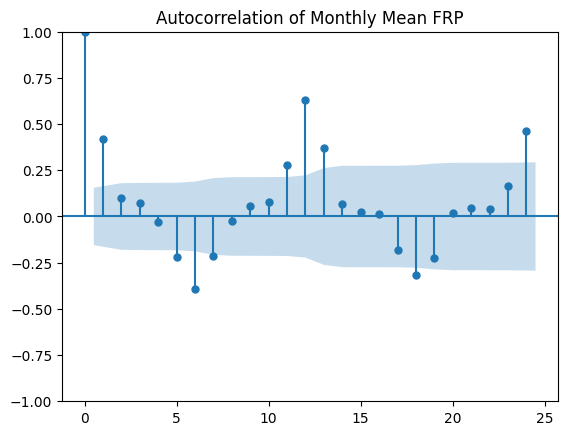

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(DL_FIRE_monthly, lags=24)  # 24 months = 2 years
plt.title("Autocorrelation of Monthly Mean FRP")

In [18]:
DL_FIRE_group_by_mounth = [
    DL_FIRE_hc[DL_FIRE_hc["acq_date"].dt.month == i]\
        .groupby(DL_FIRE_hc["acq_date"].dt.year)
        .agg(
            {
                "acq_date": ["count"],
                "brightness": ["mean", "min", "max"],
                "frp": ["mean", "min", "max"],
                "ln_frp": ["mean", "min", "max"],
            }
        ) 
    for i in range(1, 13)
]

DL_FIRE_group_by_mounth[0] # January sample

acq_date  brightness                      frp                \
            count        mean     min    max      mean   min     max   
acq_date                                                               
2012         6170  331.240246  295.05  367.0  4.994483  0.13  227.00   
2013        18418  330.751933  295.07  367.0  4.859455  0.10  196.91   
2014        16055  330.433700  295.01  367.0  4.731017  0.10  121.52   
2015        23047  332.062951  295.00  367.0  5.181910  0.10  149.69   
2016        13582  329.915618  295.01  367.0  4.678038  0.11  108.37   
2017         8352  331.468521  295.02  367.0  4.880401  0.15  134.51   
2018         9749  333.670949  295.03  367.0  5.354986  0.13  141.59   
2019        38590  330.731550  295.00  367.0  5.350605  0.10  246.24   
2020        75353  323.534893  295.01  367.0  3.830041  0.10  223.31   
2021        30852  326.857723  295.00  367.0  4.100047  0.09  106.44   
2022        20624  329.646267  295.21  367.0  4.651672  0.15  150.38   
2023        26391  326.733237  295.01  367.0  4.374467  0.10  178.35   
2024        18963  327.778524  295.04  367.0  4.407244  0.09  124.27   
2025        43269  323.982563  295.01  367.0  4.152042  0.09  224.94   

            ln_frp                      
              mean       min       max  
acq_date                                
2012      1.751183  0.756122  5.433722  
2013      1.740161  0.741937  5.292852  
2014      1.719759  0.741937  4.816403  
2015      1.776538  0.741937  5.021839  
2016      1.718493  0.746688  4.703838  
2017      1.748502  0.765468  4.916398  
2018      1.815713  0.756122  4.966962  
2019      1.771364  0.741937  5.514396  
2020      1.566692  0.741937  5.417477  
2021      1.631830  0.737164  4.686197  
2022      1.705232  0.765468  5.026377  
2023      1.651132  0.741937  5.194899  
2024      1.672333  0.737164  4.838422  
2025      1.607947  0.737164  5.424686

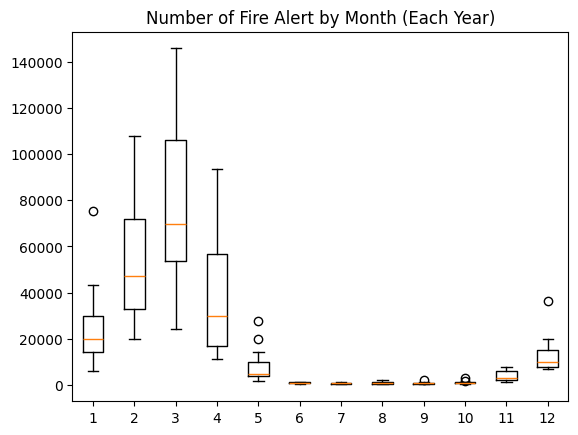

In [19]:
plt.boxplot(
    [DL_FIRE_group_by_mounth[i]["acq_date"]["count"] for i in range(12)], 
    tick_labels=[i for i in range(1, 13)]
)
plt.title("Number of Fire Alert by Month (Each Year)");

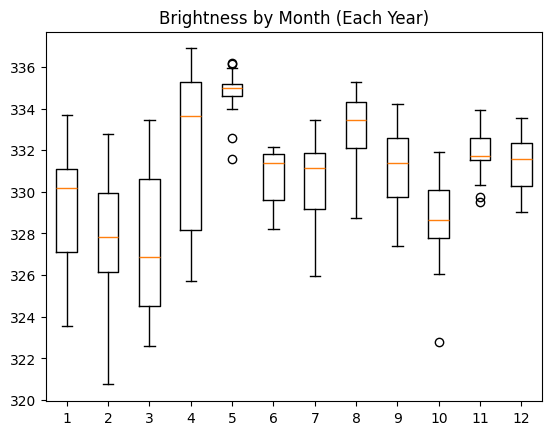

In [20]:
plt.boxplot(
    [DL_FIRE_group_by_mounth[i]["brightness"]["mean"] for i in range(12)], 
    tick_labels=[i for i in range(1, 13)]
)
plt.title("Brightness by Month (Each Year)");

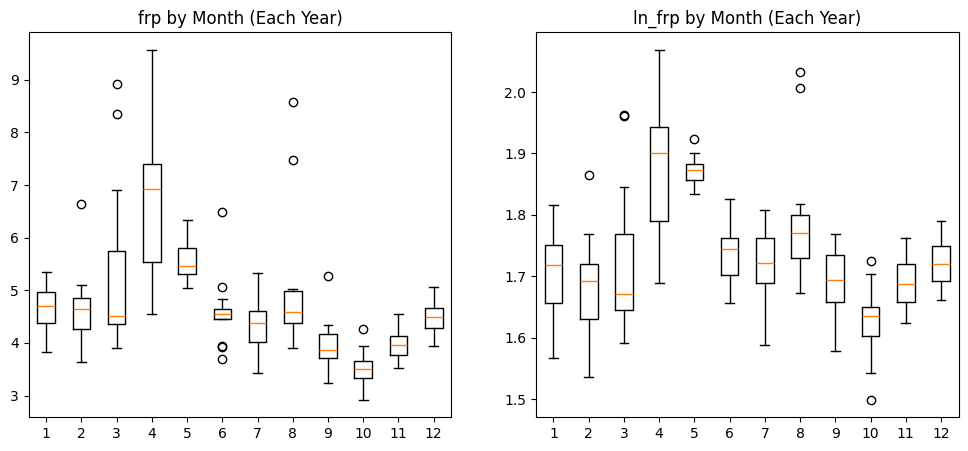

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].boxplot(
    [DL_FIRE_group_by_mounth[i]["frp"]["mean"] for i in range(12)], 
    tick_labels=[i for i in range(1, 13)]
)
axs[0].set_title("frp by Month (Each Year)");

axs[1].boxplot(
    [DL_FIRE_group_by_mounth[i]["ln_frp"]["mean"] for i in range(12)], 
    tick_labels=[i for i in range(1, 13)]
)
axs[1].set_title("ln_frp by Month (Each Year)");

,mean,min,max
acq_date,,,
2012-01-20,332.365158,295.58,367.0
2012-01-21,332.754018,296.77,367.0
2012-01-22,331.887228,295.27,367.0
2012-01-23,330.331124,296.47,367.0
2012-01-24,331.605170,296.63,367.0
...,...,...,...
2025-03-16,321.527804,295.05,367.0
2025-03-17,319.273354,295.18,367.0
2025-03-18,321.533899,295.19,367.0


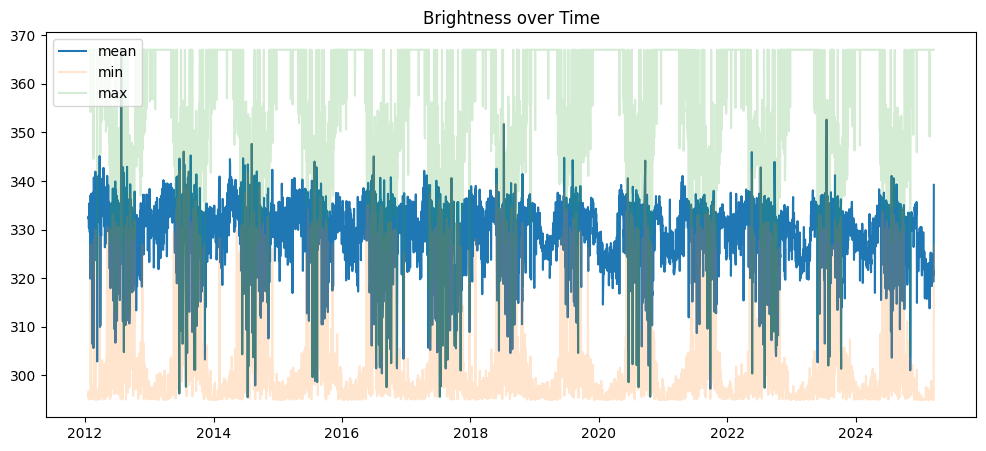

In [22]:
brightness = DL_FIRE_bgd["brightness"].aggregate(["mean", "min", "max"])

plt.figure(figsize=(12,5))
plt.plot(brightness["mean"], label="mean")
plt.plot(brightness["min"], alpha=0.2, label="min")
plt.plot(brightness["max"], alpha=0.2, label="max")
plt.title("Brightness over Time")
plt.legend()

brightness

# TRY BANGKOK

In [23]:
def haversine(lat1, lon1, lat2, lon2):
	"""
	haversine formula for calculating distance between two points on the earth
	"""
	
	# distance between latitudes longitudes
	dLat = (lat2 - lat1) * np.pi / 180.0
	dLon = (lon2 - lon1) * np.pi / 180.0

	# convert to radians
	lat1 = (lat1) * np.pi / 180.0
	lat2 = (lat2) * np.pi / 180.0

	# apply formulae
	a = (pow(np.sin(dLat / 2), 2) + pow(np.sin(dLon / 2), 2) * np.cos(lat1) * np.cos(lat2))
	rad = 6371
	c = 2 * np.asin(np.sqrt(a))
	return rad * c

In [31]:
cities = pd.read_csv("../data/a1/indicator.csv")
cities

,province_name,province_lat,province_lon,English_name,AREA
0,กรุงเทพมหานคร,13.727896,100.524123,Bangkok Metropolis,1571.371336
1,กาญจนบุรี,14.022780,99.532811,Kanchanaburi,19450.911388
2,ขอนแก่น,16.441935,102.835992,Khon Kaen,10612.202446
3,ชลบุรี,13.361143,100.984672,Chon Buri,4504.763605
4,เชียงใหม่,18.787748,98.993131,Chiang Mai,22176.037103
5,ภูเก็ต,7.981050,98.363882,Phuket,548.025456


In [32]:
DL_FIRE_hc_bkk_70km = DL_FIRE_hc[DL_FIRE_hc.apply(lambda x: haversine(x["latitude"], x["longitude"], 13.727896, 100.524123) < 70, axis=1)]

In [33]:
DL_FIRE_hc_bkk_70km

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,ln_frp
581,14.15579,100.92664,329.27,0.39,0.36,2025-03-20,635,N,VIIRS,n,2.0NRT,298.87,3.57,D,NaN,1.717395
582,14.15246,100.92716,334.94,0.39,0.36,2025-03-20,635,N,VIIRS,n,2.0NRT,300.47,3.57,D,NaN,1.717395
830,13.61798,100.87817,333.54,0.39,0.36,2025-03-20,635,N,VIIRS,n,2.0NRT,292.71,3.89,D,NaN,1.773256
1130,13.56619,99.96163,316.16,0.42,0.38,2025-03-19,1902,N21,VIIRS,n,2.0NRT,291.94,1.50,N,NaN,1.252763
1131,13.71714,100.11407,313.92,0.42,0.38,2025-03-19,1902,N21,VIIRS,n,2.0NRT,289.07,1.40,N,NaN,1.223775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499333,13.51372,100.86691,332.44,0.39,0.37,2012-01-23,627,N,VIIRS,n,2,298.47,2.55,D,0.0,1.515127
3499338,13.43346,101.06966,335.49,0.39,0.36,2012-01-23,627,N,VIIRS,n,2,297.55,1.36,D,0.0,1.211941
3499381,13.69161,100.75175,351.61,0.40,0.37,2012-01-23,627,N,VIIRS,n,2,303.97,1.97,D,0.0,1.378766
3499387,13.60951,100.65665,336.08,0.40,0.37,2012-01-23,627,N,VIIRS,n,2,303.14,5.19,D,0.0,1.972691


In [ ]:
DL_FIRE_bgd_bkk_70km = DL_FIRE_hc_bkk_70km.groupby("acq_date")

Text(0.5, 1.0, 'Number of Fire Alert over Time')

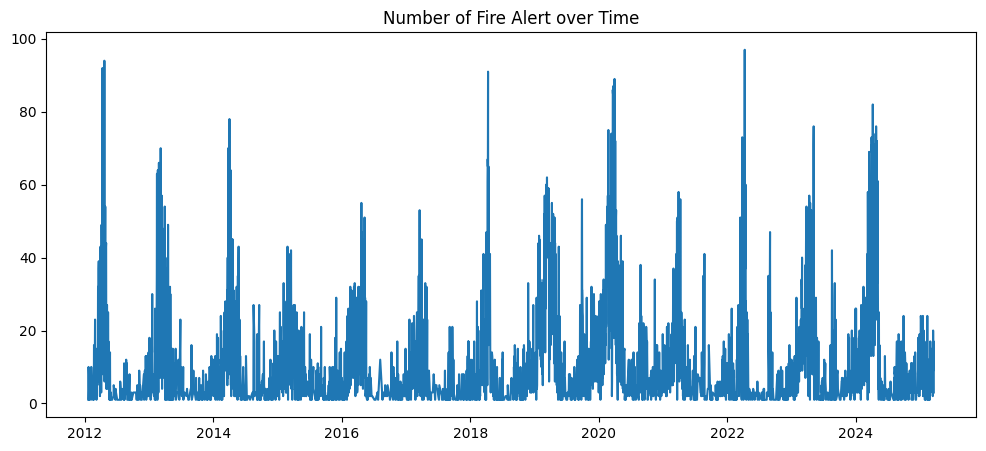

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(DL_FIRE_bgd_bkk_70km["acq_date"].aggregate(["count"]))
plt.title("Number of Fire Alert over Time")

,mean,min,max
acq_date,,,
2012-01-22,354.670000,354.67,354.67
2012-01-23,338.241000,330.98,351.61
2012-01-24,331.465000,307.93,340.16
2012-01-25,343.940000,343.94,343.94
2012-01-26,319.445000,297.66,349.83
...,...,...,...
2025-03-16,344.277000,309.97,367.00
2025-03-17,317.425556,306.62,331.44
2025-03-18,328.465000,304.69,348.21


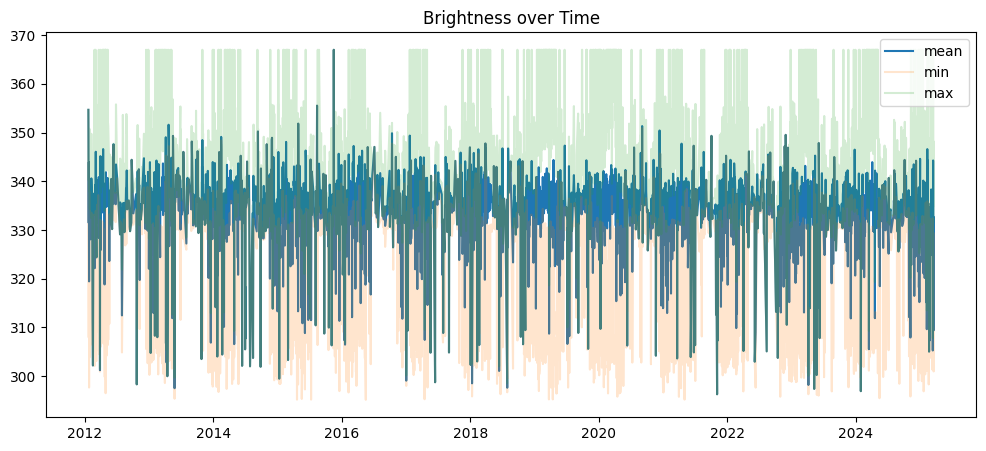

In [ ]:
brightness = DL_FIRE_bgd_bkk_70km["brightness"].aggregate(["mean", "min", "max"])

plt.figure(figsize=(12,5))
plt.plot(brightness["mean"], label="mean")
plt.plot(brightness["min"], alpha=0.2, label="min")
plt.plot(brightness["max"], alpha=0.2, label="max")
plt.title("Brightness over Time")
plt.legend()

brightness